<a href="https://colab.research.google.com/github/AklimaRimi/who-s-talking/blob/main/data_preprocess_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/AklimaRimi/who-s-talking.git

fatal: destination path 'who-s-talking' already exists and is not an empty directory.


In [2]:
! pip install tensorflow-io transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
import tensorflow_io as tfio
import ntpath
import matplotlib.pyplot as plt
import tensorflow as tf
device_name = tf.test.gpu_device_name()

In [4]:
for i in os.listdir('/content/who-s-talking/augmented-audio'):
  print(i)

Les Brown
Mel Robbins
Nick Vujicic
Rabin Sharma
Eric Thomas
Oprah Winfrey
Simon Sinek
Jay Shetty
Eckhart Tolle
Gary Vee
Brene Brown


In [5]:
Les_Brown = f'/content/who-s-talking/augmented-audio/Les Brown'
Mel_Robbins = f'/content/who-s-talking/augmented-audio/Mel Robbins'
Nick_Vujicic =f'/content/who-s-talking/augmented-audio/Nick Vujicic'
Rabin_Sharma =f'/content/who-s-talking/augmented-audio/Rabin Sharma'
Eric_Thomas =f'/content/who-s-talking/augmented-audio/Eric Thomas'
Oprah_Winfrey =f'/content/who-s-talking/augmented-audio/Oprah Winfrey'
Simon_Sinek =f'/content/who-s-talking/augmented-audio/Simon Sinek'
Jay_Shetty =f'/content/who-s-talking/augmented-audio/Jay Shetty'
Eckhart_Tolle =f'/content/who-s-talking/augmented-audio/Eckhart Tolle'
Gary_Vee =f'/content/who-s-talking/augmented-audio/Gary Vee'
Brene_Brown = f'/content/who-s-talking/augmented-audio/Brene Brown'

In [6]:
path_ls = [Les_Brown,Mel_Robbins,Nick_Vujicic,Rabin_Sharma,Eric_Thomas,
      Oprah_Winfrey,Simon_Sinek,Jay_Shetty,Eckhart_Tolle,Gary_Vee,Brene_Brown]

In [7]:
# for i in os.listdir(Les_Brown):
  # print(i)

In [8]:
Les_Brown

'/content/who-s-talking/augmented-audio/Les Brown'

In [9]:
with tf.device('/device:GPU:0'):
  def load_wav_16k_mono(filename):

    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

    wav = tf.squeeze(wav,axis = -1)

    sample_rate = tf.cast(sample_rate,dtype = tf.int64)

    wav = tfio.audio.resample(wav, rate_in = sample_rate, rate_out = 16000)

    return wav



In [10]:

Les_Brown =     tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Les Brown/*.wav')
Mel_Robbins =   tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Mel Robbins/*.wav')
Nick_Vujicic =  tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Nick Vujicic/*.wav')
Rabin_Sharma =  tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Rabin Sharma/*.wav')
Eric_Thomas =   tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Eric Thomas/*.wav')
Oprah_Winfrey = tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Oprah Winfrey/*.wav')
Simon_Sinek =   tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Simon Sinek/*.wav')
Jay_Shetty =    tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Jay Shetty/*.wav')
Eckhart_Tolle = tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Eckhart Tolle/*.wav')
Gary_Vee =      tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Gary Vee/*.wav')
Brene_Brown =   tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Brene Brown/*.wav')

In [11]:

# with tf.device('/device:GPU:0'):
Les_Brown =     tf.data.Dataset.zip((Les_Brown, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Les_Brown),), value=0))))
Mel_Robbins =   tf.data.Dataset.zip((Mel_Robbins, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Mel_Robbins),), value=1))))
Nick_Vujicic =  tf.data.Dataset.zip((Nick_Vujicic, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Nick_Vujicic),), value=2))))
Rabin_Sharma =  tf.data.Dataset.zip((Rabin_Sharma, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Rabin_Sharma),), value=3))))
Eric_Thomas =   tf.data.Dataset.zip((Eric_Thomas, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Eric_Thomas),), value=4))))
Oprah_Winfrey = tf.data.Dataset.zip((Oprah_Winfrey, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Oprah_Winfrey),), value=5))))
Simon_Sinek =   tf.data.Dataset.zip((Simon_Sinek, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Simon_Sinek),), value=6))))
Jay_Shetty =    tf.data.Dataset.zip((Jay_Shetty, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Jay_Shetty),), value=7))))
Eckhart_Tolle = tf.data.Dataset.zip((Eckhart_Tolle, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Eckhart_Tolle),), value=8))))
Gary_Vee =      tf.data.Dataset.zip((Gary_Vee, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Gary_Vee),), value=9))))
Brene_Brown = tf.data.Dataset.zip((Brene_Brown, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Brene_Brown),), value=10))))

In [12]:
ls = [Les_Brown,Mel_Robbins,Nick_Vujicic,Rabin_Sharma,Eric_Thomas,
      Oprah_Winfrey,Simon_Sinek,Jay_Shetty,Eckhart_Tolle,Gary_Vee,Brene_Brown]

In [39]:
for i in ls:
  print(len(i))

54
32
34
32
27
19
28
37
39
20
23


In [13]:
# with tf.device('/device:GPU:0'):
data = Les_Brown.concatenate(Mel_Robbins)

In [14]:
# with tf.device('/device:GPU:0'):
for i in ls[2:]:
  data = data.concatenate(i)

In [15]:
len(data)

345

In [16]:
Gary_Vee.as_numpy_iterator().next()

(b'/content/who-s-talking/augmented-audio/Gary Vee/26Gary Vee3.wav', 9)

In [17]:
load_wav_16k_mono('/content/who-s-talking/augmented-audio/Les Brown/0Les Brown0.wav')

<tf.Tensor: shape=(4800000,), dtype=float32, numpy=
array([ 0.        ,  0.        ,  0.        , ..., -0.01355633,
       -0.01083288, -0.0129936 ], dtype=float32)>

In [18]:
len(data)

345

In [19]:
with tf.device('/device:GPU:0'):
  def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[0:48000]

    spectogram = tf.signal.stft(wav, frame_length = 320, frame_step= 32 )
    spectogram = tf.abs(spectogram)
    spectogram = tf.expand_dims(spectogram, axis=2)
    return spectogram, label



In [20]:
sp,label = preprocess('/content/who-s-talking/augmented-audio/Gary Vee/21Gary Vee1.wav', 9)

In [21]:
sp

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[4.1168967e-01],
        [1.0476341e+00],
        [2.2469053e+00],
        ...,
        [7.7961871e-05],
        [2.8998640e-05],
        [8.3148479e-06]],

       [[3.4364349e-01],
        [1.0844743e+00],
        [2.1075566e+00],
        ...,
        [7.9074307e-05],
        [3.3311651e-05],
        [1.2114644e-05]],

       [[1.1738141e-01],
        [1.1337510e+00],
        [1.9620306e+00],
        ...,
        [5.9206326e-05],
        [2.5465557e-05],
        [1.0993332e-05]],

       ...,

       [[2.7515653e-01],
        [2.9530439e-01],
        [7.2614926e-01],
        ...,
        [2.7048756e-05],
        [2.0424884e-05],
        [6.9439411e-06]],

       [[1.8870968e-02],
        [2.0907988e-01],
        [4.5343608e-01],
        ...,
        [2.9137105e-05],
        [1.2498709e-05],
        [4.9462542e-06]],

       [[1.5868133e-01],
        [1.2324448e-01],
        [4.7516710e-01],
        ...,
        [2.5694580

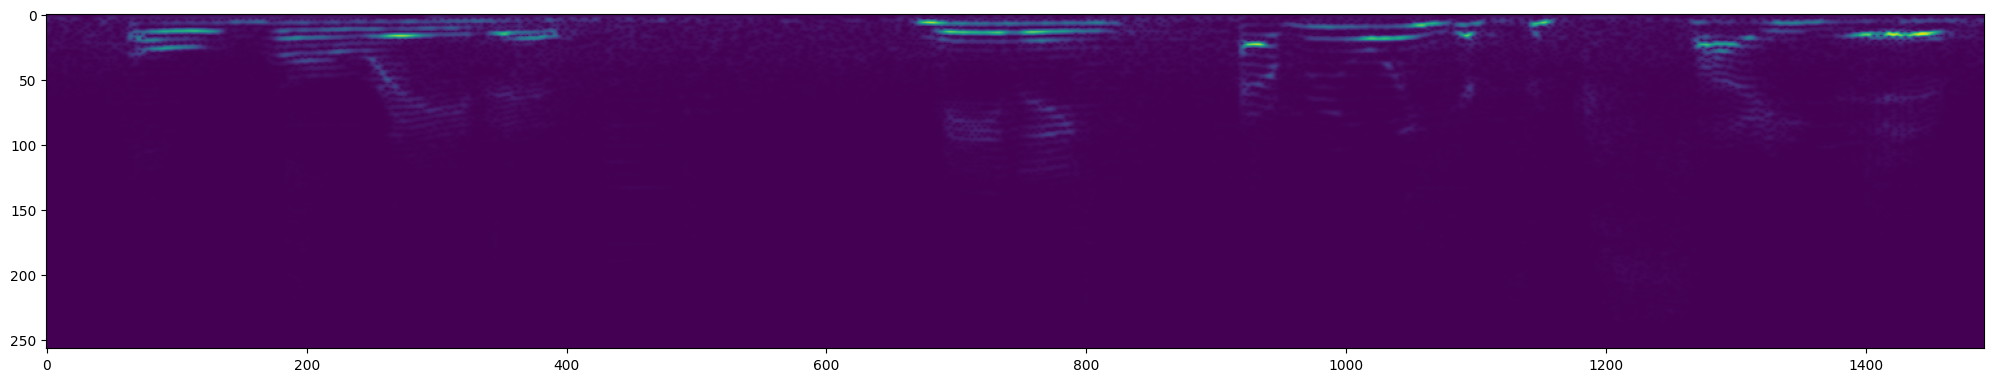

In [22]:
plt.figure(figsize = (25,5))
plt.imshow(tf.transpose(sp)[0])
plt.show()


In [23]:
# with tf.device('/device:GPU:0'):
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size = 42)
data = data.batch(8)
data = data.prefetch(4)

In [24]:
# with tf.device('/device:GPU:0'):
train =  data.take(int(len(data)*.6))
test = data.skip(int(len(data)*.6))

In [25]:
len(test)

14

In [26]:
# with tf.device('/device:GPU:0'):
#   features, label = train.as_numpy_iterator().next()

In [27]:
# features.shape

In [28]:
import transformers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,LeakyReLU,Flatten,Dense 

In [29]:
from keras.api._v2.keras import activations
from tensorflow.python.ops.nn_ops import LeakyRelu
with tf.device('/device:GPU:0'):
  model1 = Sequential()
  model1.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (1491, 257, 1)))
  model1.add(Conv2D(32,(3,3),activation = 'relu'))
  model1.add(Flatten())
  model1.add(Dense(32,activation = 'relu'))
  model1.add(Dense(16,activation = 'relu'))
  model1.add(Dense(1, activation = 'softmax'))
  model1.compile(optimizer = 'Adam' , metrics =[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()], loss = 'categorical_crossentropy')

In [30]:
model1.fit(train,epochs=10,validation_data = test)

Epoch 1/10
30/30 [==============================] - 866s 27s/step - loss: 0.0000e+00 - precision: 0.8916 - recall: 0.3957 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
30/30 [==============================] - 8s 258ms/step - loss: 0.0000e+00 - precision: 0.7750 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
30/30 [==============================] - 8s 279ms/step - loss: 0.0000e+00 - precision: 0.7792 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.9905 - val_recall: 1.0000
Epoch 4/10
30/30 [==============================] - 8s 260ms/step - loss: 0.0000e+00 - precision: 0.7750 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
30/30 [==============================] - 8s 258ms/step - loss: 0.0000e+00 - precision: 0.7750 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 6/10
30/30 [==============================] 

In [35]:
feature, label = test.as_numpy_iterator().next()

In [36]:
y_pred = model1.predict(feature)

1/1 [==============================] - 0s 50ms/step


In [38]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [37]:
label

array([8, 7, 8, 8, 8, 6, 8, 7], dtype=int32)